In [3]:
# Describe : This program attempts to optimize a user portfolio using the Efficient Frontier.


In [9]:
# Import the python Libraries
from pandas_datareader import data as web
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
# Get the stock symbols tickers in the portfolio
# FAANG
assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

In [6]:
# Assign weights to the stock.
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [10]:
# Get the Stock/Portfolio starting date
stockStarDate = '2010-01-01'

# Get the Stock/Portfolio Ending date
today = datetime.today().strftime('%Y-%m-%d')
today

'2020-10-04'

In [13]:
# Create the Dataframe to storethe adjusted close proce of the stock
df = pd.DataFrame()

# Store the adjusted close price of the stock into the df
for stock in assets:
  df[stock] = web.DataReader(stock, data_source='yahoo', start = stockStarDate, end = today)['Adj Close']


In [14]:
# Show the data Frame
df

,FB,AMZN,AAPL,NFLX,GOOG
2012-05-18,38.230000,213.850006,16.368652,9.994286,299.078979
2012-05-21,34.029999,218.110001,17.322281,10.248571,305.908386
2012-05-22,31.000000,215.330002,17.189274,9.672857,299.278229
2012-05-23,32.000000,217.279999,17.608683,10.272857,303.592072
2012-05-24,33.029999,215.240005,17.446974,10.038571,300.702881
...,...,...,...,...,...
2020-09-28,256.820007,3174.050049,114.959999,490.649994,1464.520020
2020-09-29,261.790009,3144.879883,114.089996,493.480011,1469.329956
2020-09-30,261.899994,3148.729980,115.809998,500.029999,1469.599976
2020-10-01,266.630005,3221.260010,116.790001,527.510010,1490.089966


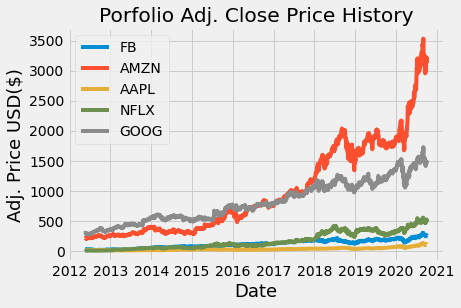

In [23]:
# Visualize the Stock/Portfolio
title = 'Porfolio Adj. Close Price History'

# Get the stocks
my_stock = df

# Creat the plot and graph
for c  in my_stock.columns.values:
  plt.plot(my_stock[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj. Price USD($)', fontsize=18)
plt.legend(my_stock.columns.values, loc='upper left')
plt.show()

In [25]:
# Show the daily simple learn
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
2012-05-18,NaN,NaN,NaN,NaN,NaN
2012-05-21,-0.109861,0.019920,0.058259,0.025443,0.022835
2012-05-22,-0.089039,-0.012746,-0.007678,-0.056175,-0.021674
2012-05-23,0.032258,0.009056,0.024399,0.062029,0.014414
2012-05-24,0.032187,-0.009389,-0.009183,-0.022806,-0.009517
...,...,...,...,...,...
2020-09-28,0.007849,0.025498,0.023869,0.016091,0.013537
2020-09-29,0.019352,-0.009190,-0.007568,0.005768,0.003284
2020-09-30,0.000420,0.001224,0.015076,0.013273,0.000184
2020-10-01,0.018060,0.023035,0.008462,0.054957,0.013943


In [28]:
# Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.139965,0.050046,0.040784,0.051045,0.046427
AMZN,0.050046,0.091919,0.037806,0.062686,0.046382
AAPL,0.040784,0.037806,0.080880,0.034633,0.037480
NFLX,0.051045,0.062686,0.034633,0.230900,0.048744
GOOG,0.046427,0.046382,0.037480,0.048744,0.064228


In [32]:
# Calculate the porfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.060798365778907584

In [34]:
# calculat the portfolio volatility aka standar deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.24657324627564034

In [35]:
# Calculate the annual portfolio return 
portfolioSimpleAnnualRturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualRturn

0.34798592821030333

In [37]:
# Show the expected annual return, volatility and variance
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_rets = str(round(portfolioSimpleAnnualRturn, 2) * 100) + '%'

print('Expected annual Return:' + percent_rets)
print('Annual volatility / Risk:' + percent_vols)
print('Annual variance: ' + percent_var)

Expected annual Return:35.0%
Annual volatility / Risk:25.0%
Annual variance: 6.0%


In [39]:
!pip install PyPortfolioOpt

     |████████████████████████████████| 51kB 1.6MB/s 


In [41]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [44]:
# Porfolio Optimization!

# Calculated the expected returns and the annualised sampled covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df) 

# optimize the max sharpe ratio 
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('FB', 0.0), ('AMZN', 0.43529), ('AAPL', 0.23064), ('NFLX', 0.33407), ('GOOG', 0.0)])
Expected annual return: 42.4%
Annual volatility: 28.0%
Sharpe Ratio: 1.44


(0.42431149783202393, 0.2804405980871631, 1.4417010254212936)

In [46]:
# Ge the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=15000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: $(:.2f)'.format(leftover))

Discrete allocation: {'AMZN': 2, 'AAPL': 31, 'NFLX': 10}
Funds remaining: $(:.2f)
